In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

In [2]:
# 資料載入
Happiness2015 = pd.read_csv('datasets_894_813759_2015.csv',sep=',')
Happiness2016 = pd.read_csv('datasets_894_813759_2016.csv',sep=',')
Happiness2017 = pd.read_csv('datasets_894_813759_2017.csv',sep=',')
Happiness2018 = pd.read_csv('datasets_894_813759_2018.csv',sep=',')
Happiness2019 = pd.read_csv('datasets_894_813759_2019.csv',sep=',')

## 檢視資料

In [3]:
Happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
Happiness2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
#2015
Happiness2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
Happiness2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
#2015
Happiness2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## 異常值處理

In [8]:
# 把GDP中data為0以平均值填補
Happiness2015['Economy (GDP per Capita)'].replace(0, Happiness2015['Economy (GDP per Capita)'].mean(),inplace  = True)
Happiness2015['Family'].replace(0, Happiness2015['Family'].mean(),inplace  = True)
Happiness2015['Health (Life Expectancy)'].replace(0, Happiness2015['Health (Life Expectancy)'].mean(),inplace  = True)
Happiness2015['Freedom'].replace(0, Happiness2015['Freedom'].mean(),inplace  = True)
Happiness2015['Trust (Government Corruption)'].replace(0, Happiness2015['Trust (Government Corruption)'].mean(),inplace  = True)
Happiness2015['Generosity'].replace(0, Happiness2015['Generosity'].mean(),inplace  = True)

In [9]:
Happiness2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


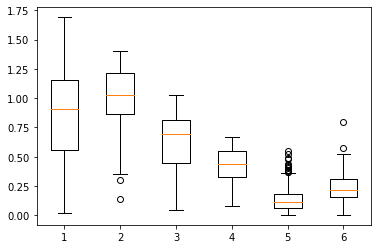

<Figure size 432x288 with 0 Axes>

In [10]:
plt.boxplot([Happiness2015['Economy (GDP per Capita)'],Happiness2015['Family'],
           Happiness2015['Health (Life Expectancy)'],Happiness2015['Freedom'],
            Happiness2015['Trust (Government Corruption)'],Happiness2015['Generosity']]
           )
fig = plt.figure()
fig.savefig('Hapiness2015.png')

## Can gdp have a corrlectaion with health?

Text(0, 0.5, 'Health')

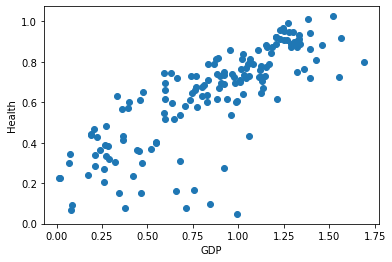

In [11]:
#點圖
plt.plot(Happiness2015['Economy (GDP per Capita)'],Happiness2015['Health (Life Expectancy)'],'o')
plt.xlabel('GDP')
plt.ylabel('Health')
#由圖推論相關極高

In [12]:
sp.stats.pearsonr(Happiness2015['Economy (GDP per Capita)'],Happiness2015['Health (Life Expectancy)'])

(0.7944764061826932, 1.2982706780568904e-35)

## 統計檢驗

In [13]:
#抽樣
np.random.seed(12345678)
x_gdp = np.random.choice(list(Happiness2015['Economy (GDP per Capita)']), 25)
y_health = np.random.choice(list(Happiness2015['Health (Life Expectancy)']), 25)

In [14]:
from scipy import stats
t,p = stats.ttest_rel(x_gdp,y_health)
print('p值= ',p)
print('t值= ',t)

p值=  2.4730126370213175e-05
t值=  5.205323877435028


In [15]:
alpha = 0.05
if (p<alpha):
    print('拒絕虛無假設(H0)，有統計顯著')
    print('也就接受對立假設(H1)：GDP和預期壽命有關連的假設存在')
else:
    print('接受虛無假設(H0)，没有統計顯著，GDP和預期壽命有關連的假設不存在')

拒絕虛無假設(H0)，有統計顯著
也就接受對立假設(H1)：GDP和預期壽命有關連的假設存在


In [16]:
np.random.seed(12345678)
x_gdp = np.random.choice(list(Happiness2015['Economy (GDP per Capita)']), 25)
y_health = np.random.choice(list(Happiness2015['Health (Life Expectancy)']), 25)

In [17]:
#假設:一個國家的Generosity(2018-2019,merge)是否會影響排名

In [18]:
df1 = pd.merge(Happiness2018,Happiness2019,on='Generosity')
df1.describe()                              

,Overall rank_x,Score_x,GDP per capita_x,Social support_x,Healthy life expectancy_x,Freedom to make life choices_x,Generosity,Perceptions of corruption_x,Overall rank_y,Score_y,GDP per capita_y,Social support_y,Healthy life expectancy_y,Freedom to make life choices_y,Perceptions of corruption_y
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,85.089744,5.211897,0.820808,1.190167,0.602141,0.433513,0.172769,0.118115,79.589744,5.352064,0.848372,1.169833,0.702192,0.355538,0.092692
std,47.578830,1.165408,0.427088,0.308569,0.275932,0.150866,0.059866,0.111482,43.830380,1.073569,0.417736,0.301252,0.244473,0.149265,0.068194
min,1.000000,3.083000,0.024000,0.000000,0.010000,0.085000,0.000000,0.009000,1.000000,2.853000,0.000000,0.437000,0.268000,0.000000,0.000000
25%,38.250000,4.313250,0.442000,0.955250,0.343000,0.306750,0.142000,0.051000,43.500000,4.597250,0.460750,0.986000,0.469000,0.247500,0.053500
50%,89.000000,5.180000,0.881000,1.228500,0.626500,0.452000,0.175000,0.082000,76.500000,5.420000,0.921000,1.241500,0.746000,0.376000,0.082000
75%,130.000000,6.225750,1.241250,1.439000,0.869750,0.571500,0.200000,0.132500,114.750000,6.120000,1.219000,1.388250,0.871000,0.485000,0.111250
max,155.000000,7.632000,1.529000,1.592000,1.030000,0.681000,0.354000,0.457000,156.000000,7.769000,1.684000,1.624000,1.088000,0.598000,0.393000


In [19]:
np.random.seed(0)
x_df1 = np.random.choice(list(df1['Generosity']), 25)
y_df1 = np.random.choice(list(df1['Overall rank_x']), 25)

from scipy import stats
t,p = stats.ttest_rel(x_df1,y_df1)
print('p值= ',p)
print('t值= ',t)

alpha = 0.05
if (p<alpha):
    print('拒絕虛無假設(H0)，有統計顯著')
    print('也就接受對立假設(H1)：假設存在')
else:
    print('接受虛無假設(H0)，没有統計顯著，假設不存在')

p值=  1.4056799908823597e-07
t值=  -7.337976918492492
拒絕虛無假設(H0)，有統計顯著
也就接受對立假設(H1)：假設存在


In [20]:
#抽樣
np.random.seed(12345678)
x_gdp = np.random.choice(list(Happiness2015['Economy (GDP per Capita)']), 25)
y_health = np.random.choice(list(Happiness2015['Health (Life Expectancy)']), 25)

from scipy import stats
t,p = stats.ttest_rel(x_gdp,y_health)
print('p值= ',p)
print('t值= ',t)

p值=  2.4730126370213175e-05
t值=  5.205323877435028


In [21]:
alpha = 0.05
if (p<alpha):
    print('拒絕虛無假設(H0)，有統計顯著')
    print('也就接受對立假設(H1)：GDP和預期壽命有關連的假設存在')
else:
    print('接受虛無假設(H0)，没有統計顯著，GDP和預期壽命有關連的假設不存在')

拒絕虛無假設(H0)，有統計顯著
也就接受對立假設(H1)：GDP和預期壽命有關連的假設存在


In [22]:
np.random.seed(12345678)
x_gdp = np.random.choice(list(Happiness2015['Economy (GDP per Capita)']), 25)
y_health = np.random.choice(list(Happiness2015['Health (Life Expectancy)']), 25)

### 簡單線性迴歸分析

In [23]:
import sklearn
from sklearn.linear_model import LinearRegression
reg = sklearn.linear_model.LinearRegression()

X = Happiness2015.loc[:,['Economy (GDP per Capita)']].values
y = Happiness2015['Health (Life Expectancy)'].values
reg.fit(X,y)
print('迴歸係數:',reg.coef_)
print('截距:',reg.intercept_)

迴歸係數: [0.484]
截距: 0.22250203612738562


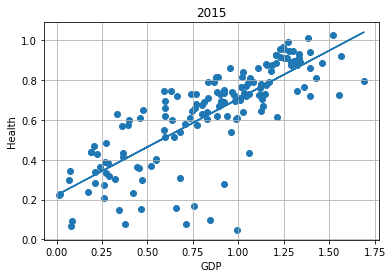

In [24]:
plt.scatter(X,y)
plt.xlabel('GDP')
plt.ylabel('Health')
plt.title('2015')

plt.plot(X,reg.predict(X))
plt.grid(True)

In [25]:
print("決定係數:",reg.score(X,y))

決定係數: 0.6311927599809676


## 找出所有關聯

C:\Users\Eric\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


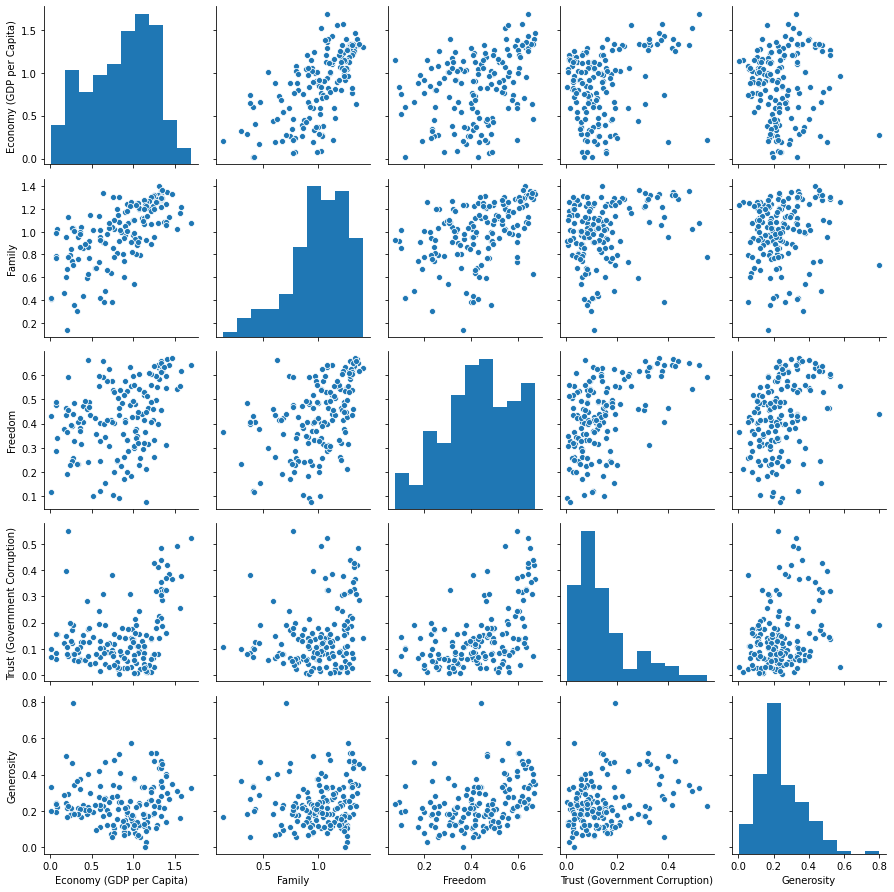

In [37]:
cols = ['Economy (GDP per Capita)', 'Family','Freedom', 'Trust (Government Corruption)', 'Generosity']
df = Happiness2015[['Economy (GDP per Capita)','Family','Freedom','Trust (Government Corruption)','Generosity']]

sns.pairplot(df,size=2.5)
plt.tight_layout()
plt.show()

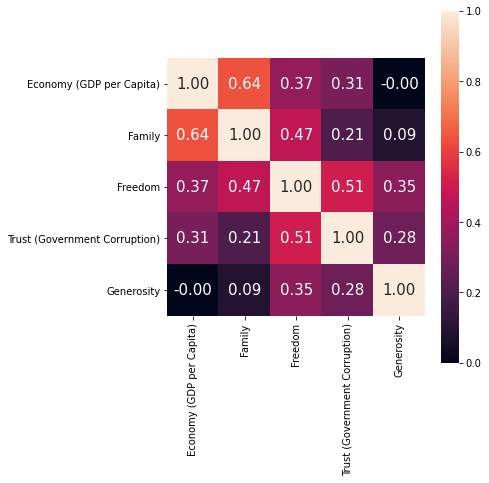

In [27]:
plt.figure(figsize=(7,7))
cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

## 世界地圖

In [28]:
import csv
import pygal.maps.world
from pygal.maps.world import COUNTRIES

def getCountryCode(countryName):
    '''輸入國家名稱回傳國家代碼'''
    for dictCode, dictName in COUNTRIES.items():    # 搜尋國家與國家代碼字典
        if dictName == countryName:
            return dictCode                         # 如果找到則回傳國家代碼
    return None                                     # 找不到則回傳None

In [29]:
#獲取每個國家的國家簡稱--GDP的對應數據
filename="datasets_894_813759_2015.csv"

In [30]:

with open(filename) as f:   #獲取文件對象
    reader=csv.reader(f)    #創建閱讀器對象
    header_row=next(reader) #獲取首行
    World_happiness={}          #創建一個存儲國家簡稱--GDP的字典
    for row in reader:      
        country=row[0]  
        code=getCountryCode(country)
        happiness=float(row[3])
        if code:
            World_happiness[code]=happiness
#創建世界地圖
worldMap = pygal.maps.world.World()
worldMap.title = "World Happiness in 2015"
worldMap.add('2015', World_happiness)
worldMap.render_to_file('World_happiness2015.svg')

# 2015-2019

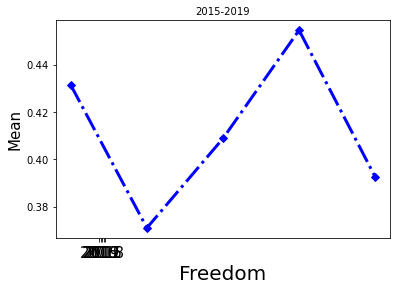

In [36]:
y1 = Happiness2015['Freedom'].mean(),Happiness2016['Freedom'].mean(),Happiness2017['Freedom'].mean(),Happiness2018['Freedom to make life choices'].mean(),Happiness2019['Freedom to make life choices'].mean()

labels = ['2015','2016','2017','2018','2019','2020']
plt.xlabel('Freedom',fontsize=20)
plt.ylabel('Mean',fontsize=15)
plt.xticks(y1, labels,fontsize=15)
plt.title('2015-2019',fontsize=10)
plt.plot(y1,'bD-.',linewidth=3)
plt.show()

## 幸福感特徵趨勢&占比

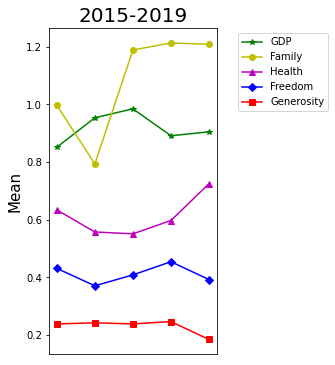

In [35]:
#觀察2015-2019 趨勢變化,散佈圖,legend error
x1 = Happiness2015['Economy (GDP per Capita)'].mean(),Happiness2016['Economy (GDP per Capita)'].mean(),Happiness2017['Economy..GDP.per.Capita.'].mean(),Happiness2018['GDP per capita'].mean(),0.905
x2 = Happiness2015['Family'].mean(),Happiness2016['Family'].mean(),Happiness2017['Family'].mean(),Happiness2018['Social support'].mean(),Happiness2019['Social support'].mean()
x3 = Happiness2015['Health (Life Expectancy)'].mean(),Happiness2016['Health (Life Expectancy)'].mean(),Happiness2017['Health..Life.Expectancy.'].mean(),Happiness2018['Healthy life expectancy'].mean(),Happiness2019['Healthy life expectancy'].mean()
x4 = Happiness2015['Freedom'].mean(),Happiness2016['Freedom'].mean(),Happiness2017['Freedom'].mean(),Happiness2018['Freedom to make life choices'].mean(),Happiness2019['Freedom to make life choices'].mean()
x5 = Happiness2015['Generosity'].mean(),Happiness2016['Generosity'].mean(),Happiness2015['Generosity'].mean(),Happiness2017['Generosity'].mean(),Happiness2019['Generosity'].mean()

plt.figure(figsize=(3,6))
plt.xlabel('',fontsize=20)
plt.ylabel('Mean',fontsize=15)
plt.xticks([])

plt.plot(x1,'g*-',label='GDP')
plt.plot(x2,'yo-',label='Family')
plt.plot(x3,'m^-',label='Health')
plt.plot(x4,'bD-',label='Freedom')
plt.plot(x5,'rs-',label='Generosity')
plt.legend(loc='best',fontsize=10,bbox_to_anchor=(1.1, 1),ncol=1)
plt.title('2015-2019',fontsize=20)
plt.savefig('2015-2019 scatter mean.png')
plt.show()

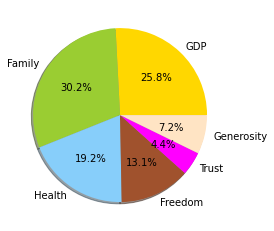

In [34]:
labels = ['GDP','Family','Health','Freedom','Trust','Generosity']
sizes  = Happiness2015['Economy (GDP per Capita)'].mean(),Happiness2015['Family'].mean(),Happiness2015['Health (Life Expectancy)'].mean(),Happiness2015['Freedom'].mean(),Happiness2015['Trust (Government Corruption)'].mean(),Happiness2015['Generosity'].mean()
colors = ['gold','yellowgreen','lightskyblue','sienna','fuchsia','bisque']

plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow = True)
plt.savefig("2015 pie.png")
plt.show()